In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv('Wholesale customers data.csv')

In [20]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [17]:
df[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
for col in categorical_features:
    dummies=pd.get_dummies(df[col],prefix=col)
    df=pd.concat([df,dummies],axis=1)
    

In [25]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [26]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [85]:
x=df.iloc[:,[0,1]].values

In [89]:
x

array([[ 12669,   9656],
       [  7057,   9810],
       [  6353,   8808],
       [ 13265,   1196],
       [ 22615,   5410],
       [  9413,   8259],
       [ 12126,   3199],
       [  7579,   4956],
       [  5963,   3648],
       [  6006,  11093],
       [  3366,   5403],
       [ 13146,   1124],
       [ 31714,  12319],
       [ 21217,   6208],
       [ 24653,   9465],
       [ 10253,   1114],
       [  1020,   8816],
       [  5876,   6157],
       [ 18601,   6327],
       [  7780,   2495],
       [ 17546,   4519],
       [  5567,    871],
       [ 31276,   1917],
       [ 26373,  36423],
       [ 22647,   9776],
       [ 16165,   4230],
       [  9898,    961],
       [ 14276,    803],
       [  4113,  20484],
       [ 43088,   2100],
       [ 18815,   3610],
       [  2612,   4339],
       [ 21632,   1318],
       [ 29729,   4786],
       [  1502,   1979],
       [   688,   5491],
       [ 29955,   4362],
       [ 15168,  10556],
       [  4591,  15729],
       [ 56159,    555],


In [27]:
# apply scaling to all features
from sklearn.preprocessing import MinMaxScaler

In [93]:
mms=MinMaxScaler()

In [94]:
mms.fit(x)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [95]:
transformed=mms.fit_transform(x)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
from sklearn.cluster import KMeans

In [96]:
sum_squared_error=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean=kmean.fit(transformed)
    sum_squared_error.append(kmean.inertia_)   


In [97]:
sum_squared_error

[10.016382840859329,
 6.49568180114759,
 4.368558692661669,
 3.203658024306678,
 2.3167986817334425,
 1.8715081410207899,
 1.5154386129924522,
 1.2356830841039557,
 1.0980278006243624,
 0.9710744285642734]

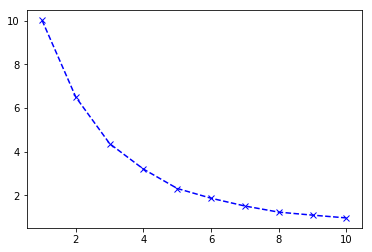

In [98]:
plt.plot(range(1,11),sum_squared_error,'bx--')

In [99]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(x)


In [103]:
len(y_kmeans)

440

In [101]:
kmeans.cluster_centers_

array([[ 5499.09583333,  3468.        ],
       [50049.68181818,  4447.40909091],
       [30445.        , 48782.66666667],
       [20758.86086957,  4081.22608696],
       [ 5075.71929825, 15055.38596491]])

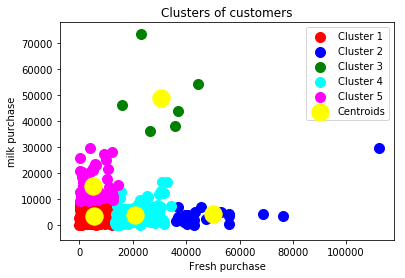

In [102]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of purchase')
plt.xlabel('Fresh purchase')
plt.ylabel('milk purchase')
plt.legend()
plt.show()